In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/MyDrive/DatasetUas/uas'

/content/gdrive/MyDrive/DatasetUas/uas


In [5]:
import os

train_dir = "/content/gdrive/MyDrive/DatasetUas/uas/train"
val_dir = "/content/gdrive/MyDrive/DatasetUas/uas/test"

belimbingWuluh_train_path = train_dir + '/belimbingWuluh'
jambuBiji_train_path = train_dir + '/jambuBiji'
belimbingWuluh_val_path = val_dir + '/belimbingWuluh'
jambuBiji_val_path = val_dir + '/jambuBiji'

belimbingWuluh_len_train = len(os.listdir(belimbingWuluh_train_path))
jambuBiji_len_train = len(os.listdir(jambuBiji_train_path))
belimbingWuluh_len_val = len(os.listdir(belimbingWuluh_val_path))
jambuBiji_len_val = len(os.listdir(jambuBiji_val_path))

print("Jumlah dataset training : ", belimbingWuluh_len_train + jambuBiji_len_train)
print("Jumlah dataset validasi : ", belimbingWuluh_len_val + jambuBiji_len_val)
print("\n")
print("Jumlah train kelas belimbing wuluh : ", belimbingWuluh_len_train)
print("Jumlah train kelas jambu biji      : ", jambuBiji_len_train)
print("Jumlah validasi kelas belimbing wuluh : ", belimbingWuluh_len_val)
print("Jumlah validasi kelas jambu biji      : ", jambuBiji_len_val)

Jumlah dataset training :  700
Jumlah dataset validasi :  700


Jumlah train kelas belimbing wuluh :  350
Jumlah train kelas jambu biji      :  350
Jumlah validasi kelas belimbing wuluh :  350
Jumlah validasi kelas jambu biji      :  350


In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size  = 75,
    class_mode  = 'binary')

validatio_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size  = 75,
    class_mode  = 'binary')

Found 700 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout

In [9]:
model = Sequential()

model.add(InputLayer(input_shape = [150, 150, 3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=4, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=4, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=4, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=4, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(0.0001))

In [10]:
model.add(Dense(1026, activation = 'relu'))
model.add(Dropout(0.0001))
model.add(Dense(1026, activation = 'relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 38, 38, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 10, 10, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 3, 3, 256)        0

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam (lr = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/DatasetUas/uas/dataset.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch =10,
    epochs = 100,
    validation_data = validatio_generator,
    validation_steps = 10,
    callbacks = [callbacks, best_model])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6173 - acc: 0.5457
Epoch 1: val_acc did not improve from 0.97600
10/10 [==============================] - 77s 8s/step - loss: 0.6173 - acc: 0.5457 - val_loss: 0.5968 - val_acc: 0.6743
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.5910 - acc: 0.6700
Epoch 2: val_acc did not improve from 0.97600
10/10 [==============================] - 72s 8s/step - loss: 0.5910 - acc: 0.6700 - val_loss: 0.5802 - val_acc: 0.6757
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.5844 - acc: 0.6700
Epoch 3: val_acc did not improve from 0.97600
10/10 [==============================] - 72s 7s/step - loss: 0.5844 - acc: 0.6700 - val_loss: 0.5679 - val_acc: 0.6800
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.5814 - acc: 0.6543
Epoch 4: val_acc did not improve from 0.97600
10/10 [==============================] - 72s 7s/step - loss: 0.5814 - acc: 0.6543 - val_loss: 0.567

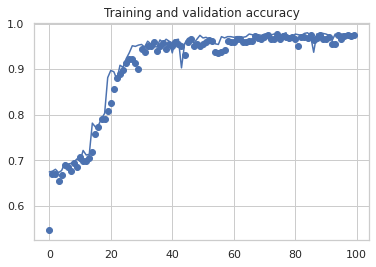

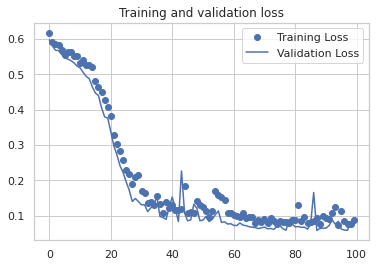

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

Found 700 images belonging to 2 classes.


<ipython-input-37-8452ea196d9a>:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=test_generator)


Accuracy  : 0.97
Precision : 0.9713891549791632
f1Score : 0.969977881663838
[[330  20]
 [  1 349]]


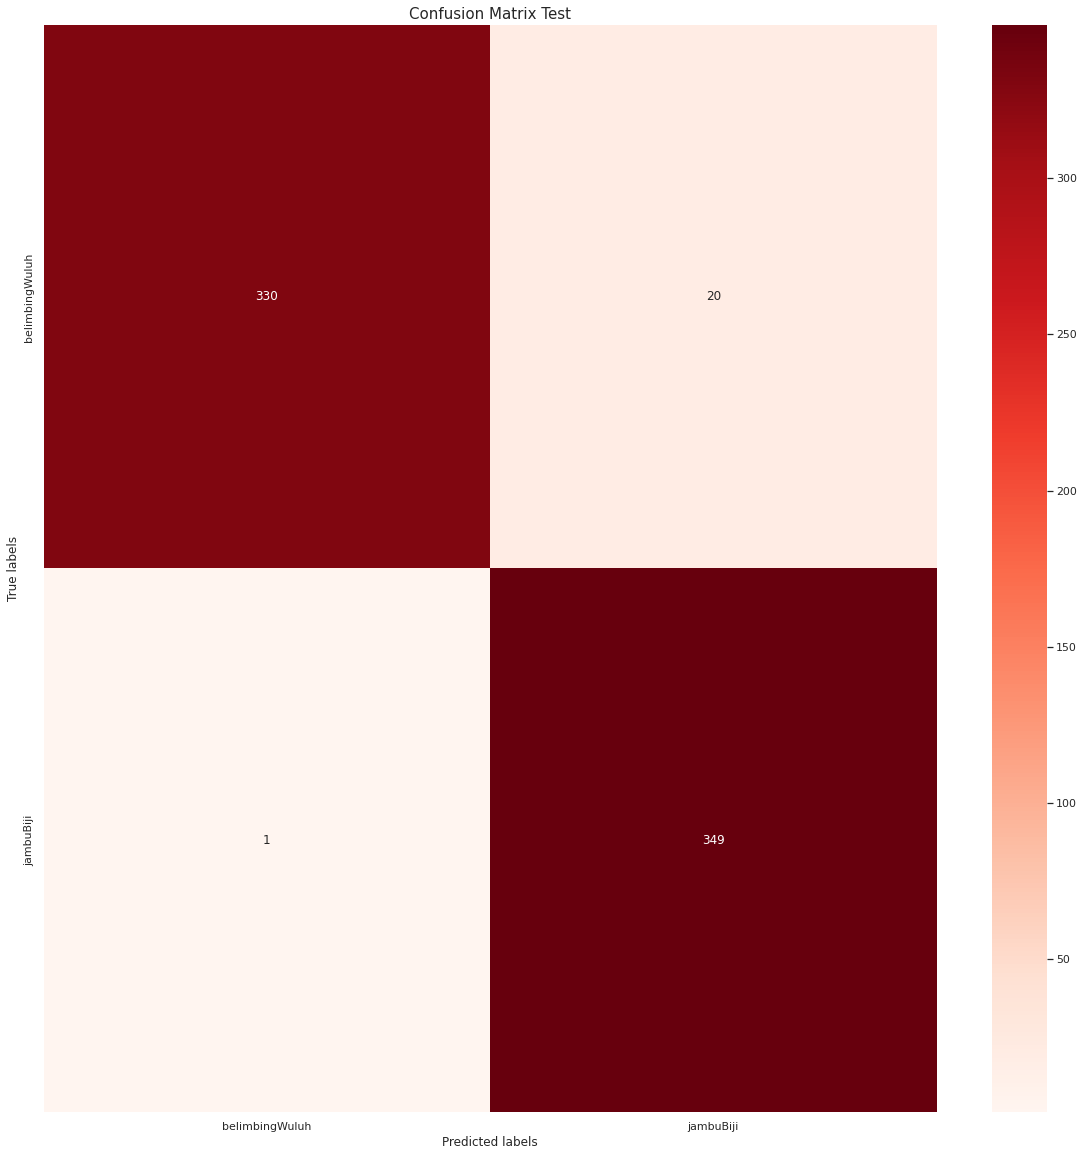

In [37]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred, average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=75

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/gdrive/MyDrive/DatasetUas/uas/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=15)
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

                precision    recall  f1-score   support

belimbingWuluh       1.00      0.94      0.97       350
     jambuBiji       0.95      1.00      0.97       350

      accuracy                           0.97       700
     macro avg       0.97      0.97      0.97       700
  weighted avg       0.97      0.97      0.97       700



In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
import numpy as np
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/DatasetUas/uas/dataset.h5'
model = load_model(model_path)

from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  
  path= fn
  img=load_img(path, target_size=(100,100))
  
  x=img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=75)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a Belimbing Wuluh")
    
  else:
    print(fn + " is a Jambu Biji")

Saving Belimbing Wuluh001.jpg to Belimbing Wuluh001 (5).jpg
Saving Belimbing Wuluh002.jpg to Belimbing Wuluh002 (5).jpg
Saving Belimbing Wuluh003.jpg to Belimbing Wuluh003 (4).jpg
1/1 [==============================] - 0s 98ms/step
[1.]
Belimbing Wuluh001.jpg is a Belimbing Wuluh
1/1 [==============================] - 0s 28ms/step
[1.]
Belimbing Wuluh002.jpg is a Belimbing Wuluh
1/1 [==============================] - 0s 26ms/step
[1.]
Belimbing Wuluh003.jpg is a Belimbing Wuluh
